**Melchizedek Ackah-Blay**

December 7, 2024

Car Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

*loading dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/car_dataset.csv')

*outputing sample data*

In [3]:
df.sample(4)

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
113034,113034,seat,leon,gen-iii-2012,2015,191000,1598,Diesel,Wągrowiec,Wielkopolskie,36900
25022,25022,bmw,seria-1,gen-e87-2004-2013,2005,207200,1995,LPG,Wodzisław Śląski,Śląskie,10900
70950,70950,toyota,avensis,gen-iii-2009,2010,233924,1798,Gasoline,Szczytno,Warmińsko-mazurskie,31000
116751,116751,volvo,xc-60,gen-ii-2017,2021,15000,1969,Hybrid,Częstochowa,Śląskie,259900


*looking at data shape*

In [4]:
df.shape

(117927, 11)

*looking at information from the data*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


*looking at the columns*

In [6]:
df.columns

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')

*dropping models i will not use*

In [7]:
df.drop(columns = ['Unnamed: 0', 'generation_name'], inplace = True)

*looking for null values*

In [8]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

*looking for duplicates*

In [9]:
df.duplicated().sum()

6761

*removing duplicates*

In [10]:
df.drop_duplicates(inplace = True)

*looing at new size*

In [11]:
df.shape

(111166, 9)

*analyzing car models*

In [12]:
car_models = df['model'].value_counts(normalize = True).sort_values(ascending = False)
car_models.head(10)

model
astra      0.028642
seria-3    0.026195
a4         0.026024
golf       0.022588
seria-5    0.021805
a6         0.021679
focus      0.019125
octavia    0.017955
passat     0.017784
mondeo     0.016597
Name: proportion, dtype: float64

*analyzing mileage*

In [13]:
print(f"the average mileage of the cars is {df['mileage'].mean()}")
print(f"the highest mileage is {df['mileage'].max()}")
print(f"the lowest mileage is {df['mileage'].min()}")

the average mileage of the cars is 141818.02698666858
the highest mileage is 2800000
the lowest mileage is 0


*analyzing year of the cars*

In [14]:
print(f"the average model year of the cars is {df['year'].mean()}")
print(f"the oldest model year is {df['year'].min()} years")
print(f"the newest model year is {df['year'].max()} years")

the average model year of the cars is 2012.8836064983898
the oldest model year is 1945 years
the newest model year is 2022 years


*analyzing prices by mark*

In [15]:
price_by_mark = df.groupby('mark')['price'].mean().sort_values(ascending = False)
price_by_mark.head(10)

mark
mercedes-benz    135598.585963
bmw              121183.286793
audi             105392.749011
volvo             92472.250599
mini              71536.833643
alfa-romeo        65794.752187
volkswagen        61870.866546
skoda             61279.840091
kia               58181.175942
mazda             56388.569801
Name: price, dtype: float64

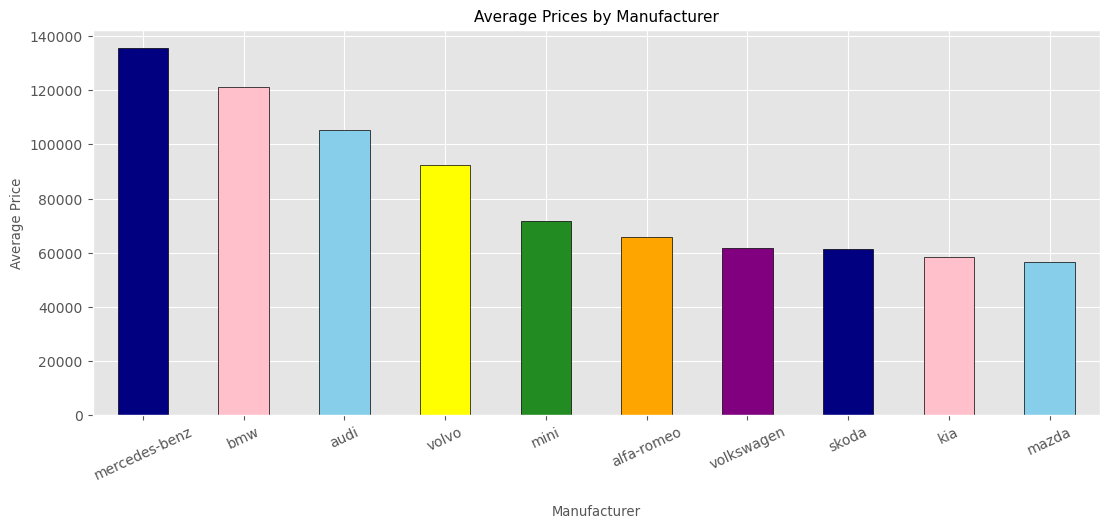

In [16]:
plt.figure(figsize = (13, 5))
price_by_mark.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Manufacturer', fontsize = 11)
plt.xlabel('\nManufacturer', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

*analyzing prices by year*

In [17]:
price_by_year = df.groupby('year')['price'].mean().sort_values(ascending = False)
price_by_year.head(10)

year
1968    369900.000000
2022    204310.590811
2021    198880.489540
2020    170343.388906
1952    149900.000000
1966    134414.285714
1964    129450.000000
1967    127225.000000
2019    125172.415394
1965    119900.000000
Name: price, dtype: float64

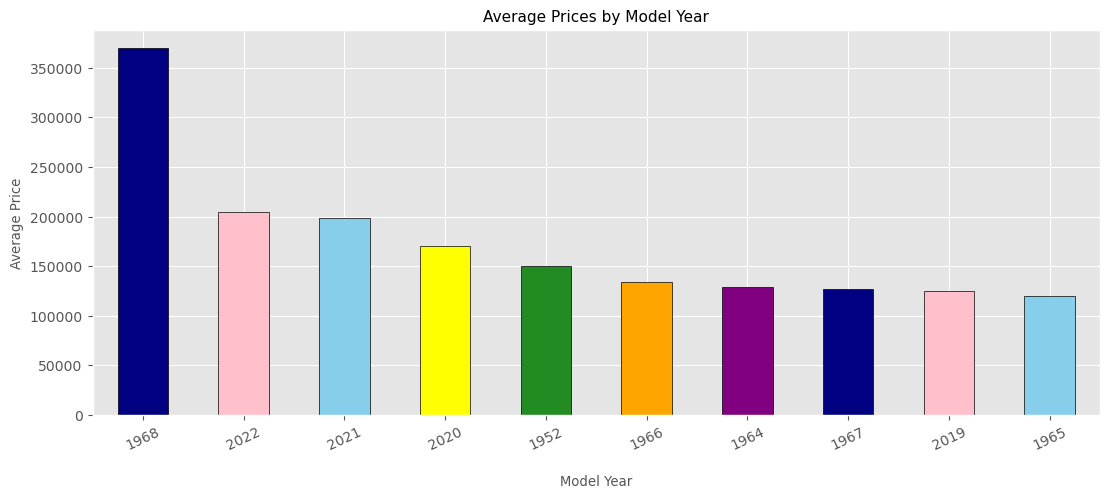

In [18]:
plt.figure(figsize = (13, 5))
price_by_year.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Model Year', fontsize = 11)
plt.xlabel('\nModel Year', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

*analyzing prices by fuel type*

In [19]:
price_by_fuel = df.groupby('fuel')['price'].mean().sort_values(ascending = False)
price_by_fuel.head(10)

fuel
Electric    191076.428951
Hybrid      159289.210872
Diesel       70620.197740
Gasoline     65157.168699
CNG          30796.476190
LPG          27307.425921
Name: price, dtype: float64

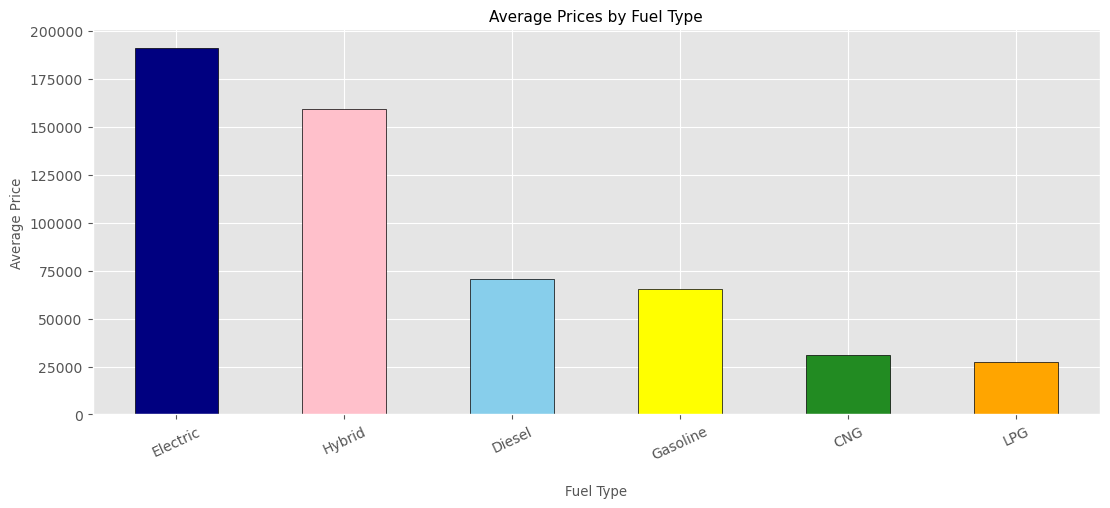

In [20]:
plt.figure(figsize = (13, 5))
price_by_fuel.head(10).plot(kind = 'bar', color = ['navy', 'pink', 'skyblue', 'yellow', 'forestgreen', 'orange', 'purple'], edgecolor = 'black')
plt.title('Average Prices by Fuel Type', fontsize = 11)
plt.xlabel('\nFuel Type', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Average Price', fontsize = 9.5)
plt.show()

In [21]:
df['fuel']

0           Diesel
1           Diesel
2           Diesel
3           Diesel
4              CNG
            ...   
117250      Diesel
117251    Gasoline
117252      Diesel
117253    Gasoline
117254    Gasoline
Name: fuel, Length: 111166, dtype: object

*correlation analysis*

In [22]:
numerical_variables = df.select_dtypes(include = ['int', 'float'])
correlation_matrix = numerical_variables.corr()

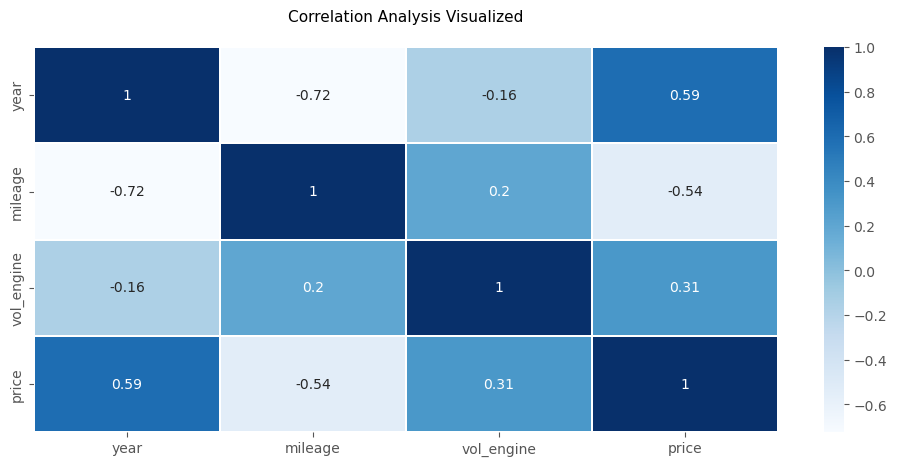

In [23]:
plt.figure(figsize = (12, 5))
sns.heatmap(correlation_matrix, annot = True, linewidth = 0.3, cmap = 'Blues')
plt.title('Correlation Analysis Visualized\n', fontsize = 11)
plt.show()

*distribution of car year*

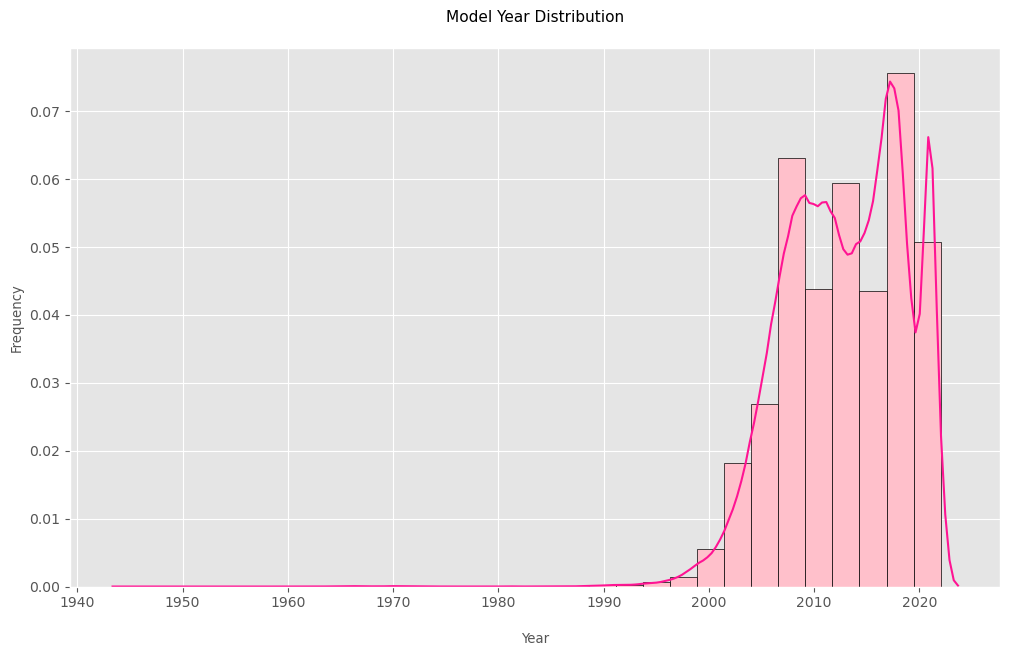

In [24]:
plt.figure(figsize = (12, 7))
plt.hist(df['year'], density = True, bins = 30, edgecolor = 'black', color = 'pink')
sns.kdeplot(df['year'], color = 'deeppink')
plt.title('Model Year Distribution\n', fontsize = 11)
plt.xlabel('\nYear', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*distribution of volume engine*

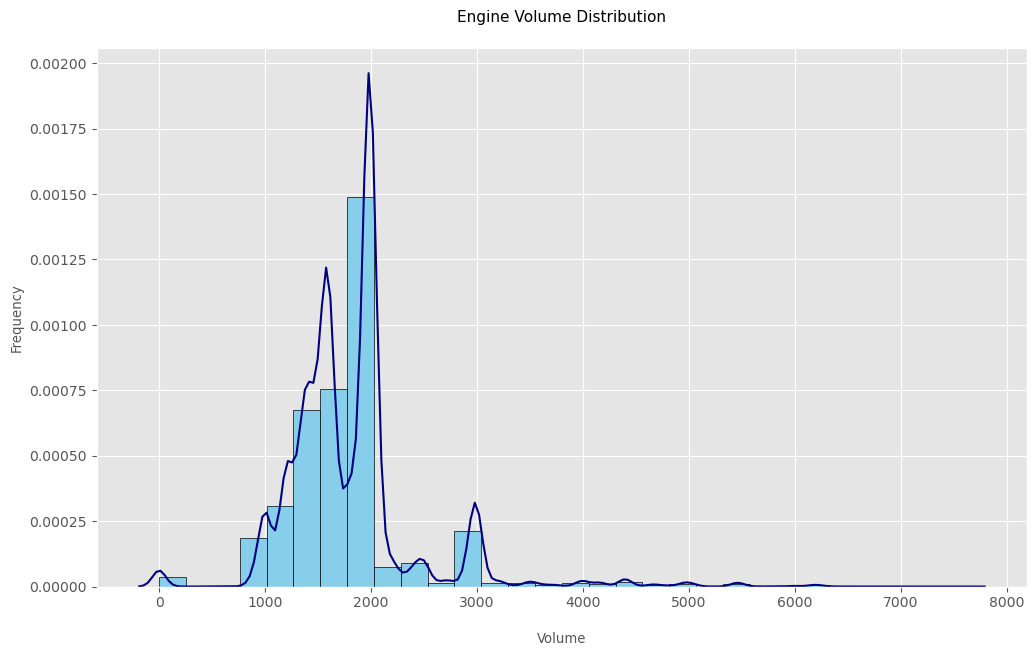

In [25]:
plt.figure(figsize = (12, 7))
plt.hist(df['vol_engine'], density = True, bins = 30, edgecolor = 'black', color = 'skyblue')
sns.kdeplot(df['vol_engine'], color = 'navy')
plt.title('Engine Volume Distribution\n', fontsize = 11)
plt.xlabel('\nVolume', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*distribution of mileage*

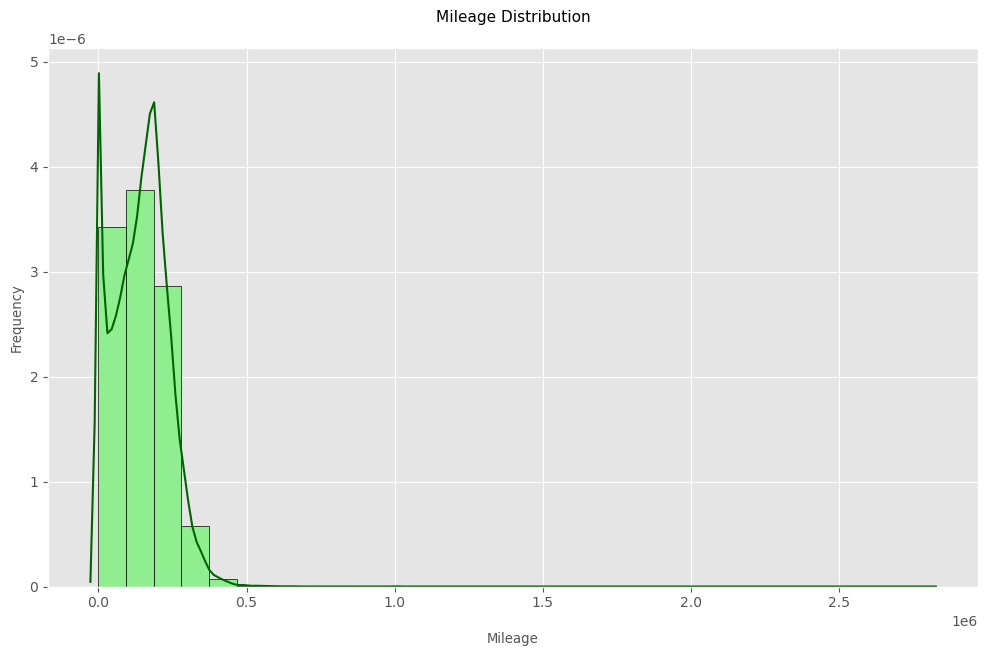

In [26]:
plt.figure(figsize = (12, 7))
plt.hist(df['mileage'], density = True, bins = 30, edgecolor = 'black', color = 'lightgreen')
sns.kdeplot(df['mileage'], color = 'darkgreen')
plt.title('Mileage Distribution\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*mileage and price analysis*

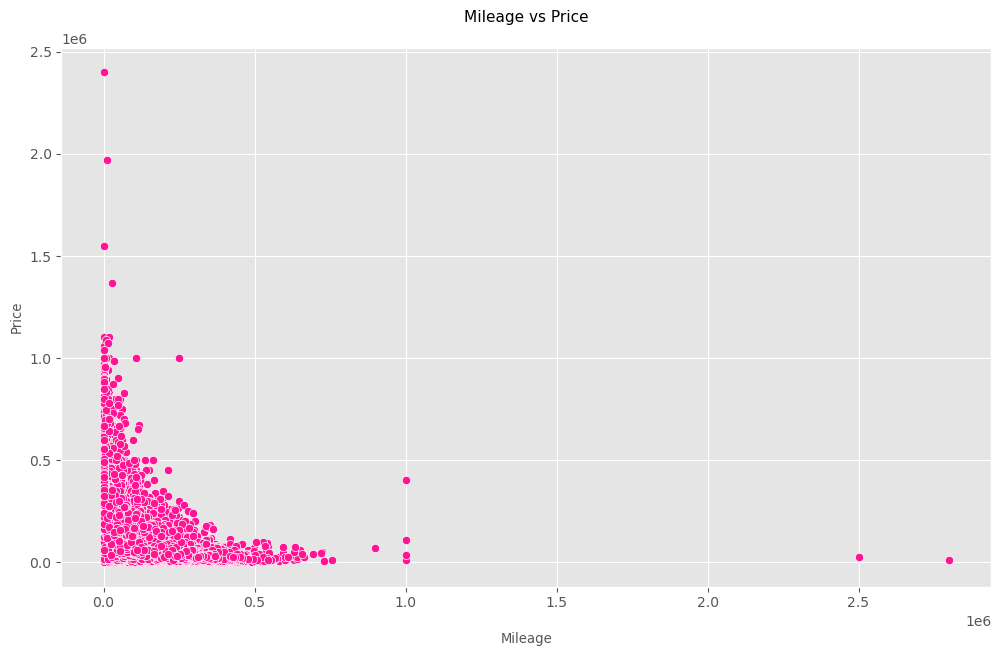

In [27]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = df['mileage'], y = df['price'], color = 'deeppink')
plt.title('Mileage vs Price\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*engine volume and price analysis*

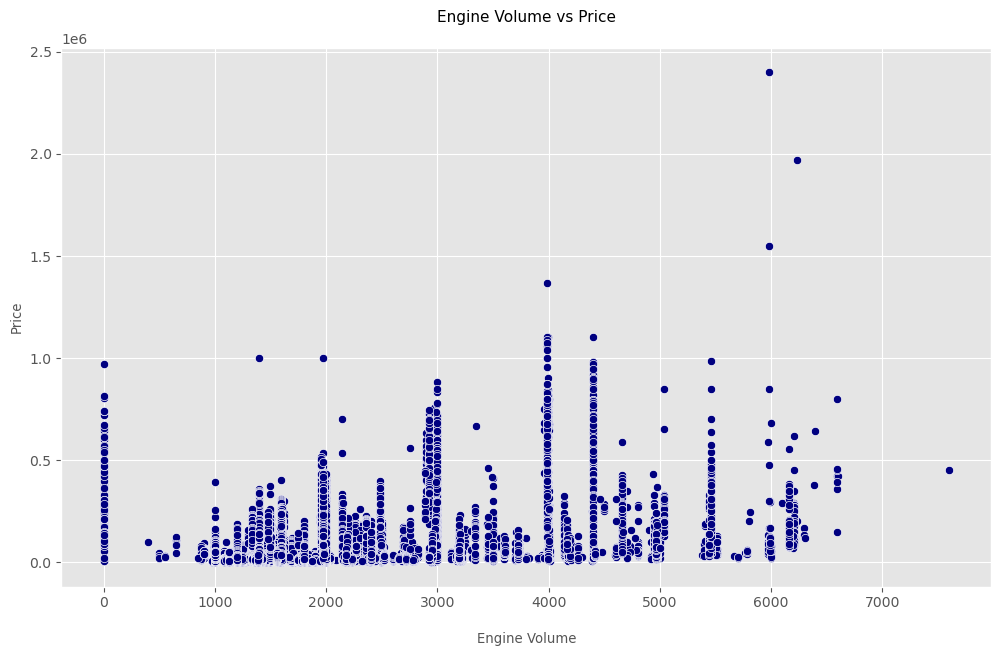

In [28]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = df['vol_engine'], y = df['price'], color = 'navy')
plt.title('Engine Volume vs Price\n', fontsize = 11)
plt.xlabel('\nEngine Volume', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*supplementary price analysis*

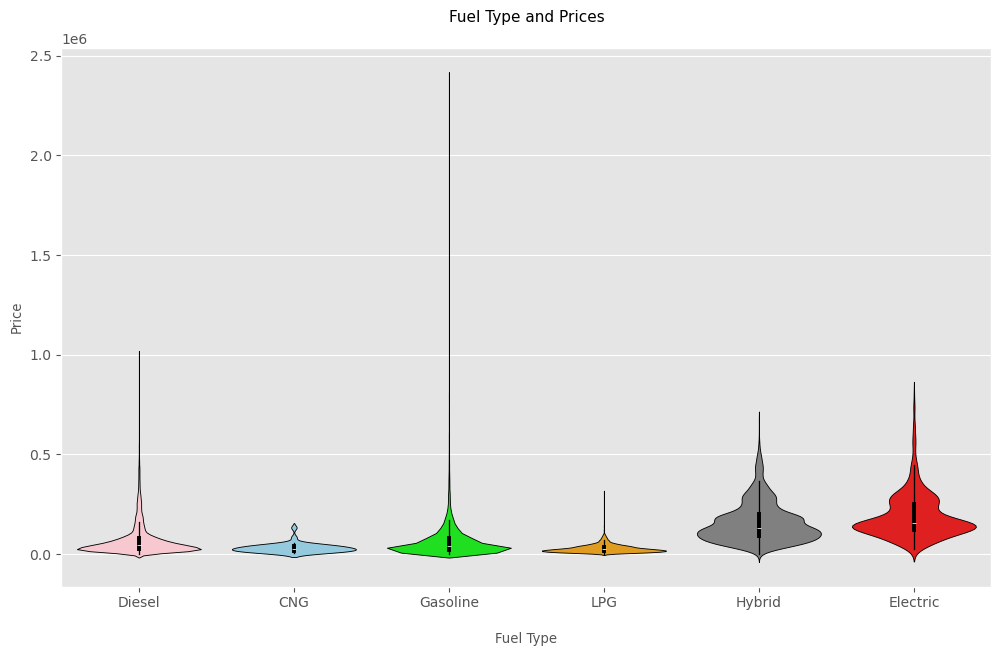

In [29]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (12, 7))
sns.violinplot(x = df['fuel'], y = df['price'], edgecolor = 'black', palette = ['pink', 'skyblue', 'lime', 'orange', 'gray', 'red'])
plt.title('Fuel Type and Prices\n', fontsize = 11)
plt.xlabel('\nFuel Type', fontsize = 9.5)
plt.ylabel('Price', fontsize = 9.5)
plt.show()

*most popular car models analysis*

In [30]:
popular_models = df['model'].value_counts().sort_values(ascending = False)
popular_models.head(10)

model
astra      3184
seria-3    2912
a4         2893
golf       2511
seria-5    2424
a6         2410
focus      2126
octavia    1996
passat     1977
mondeo     1845
Name: count, dtype: int64

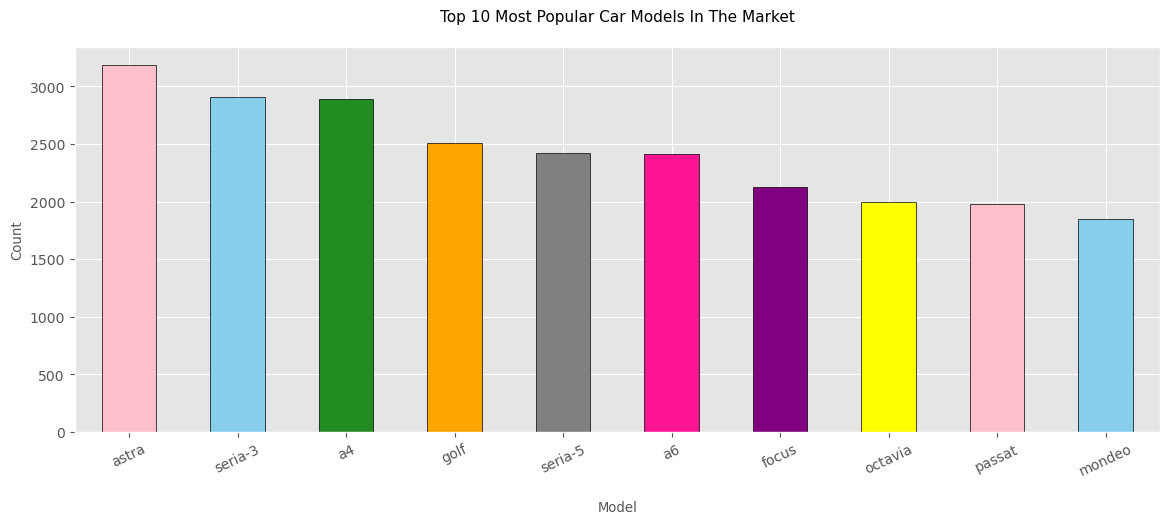

In [31]:
plt.figure(figsize = (14, 5))
popular_models.head(10).plot(kind = 'bar', edgecolor = 'black', color = ['pink', 'skyblue', 'forestgreen', 'orange', 'gray', 'deeppink', 'purple', 'yellow'])
plt.title('Top 10 Most Popular Car Models In The Market\n', fontsize = 11)
plt.xlabel('\nModel', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Count', fontsize = 9.5)
plt.show()

*low mileage analysis*

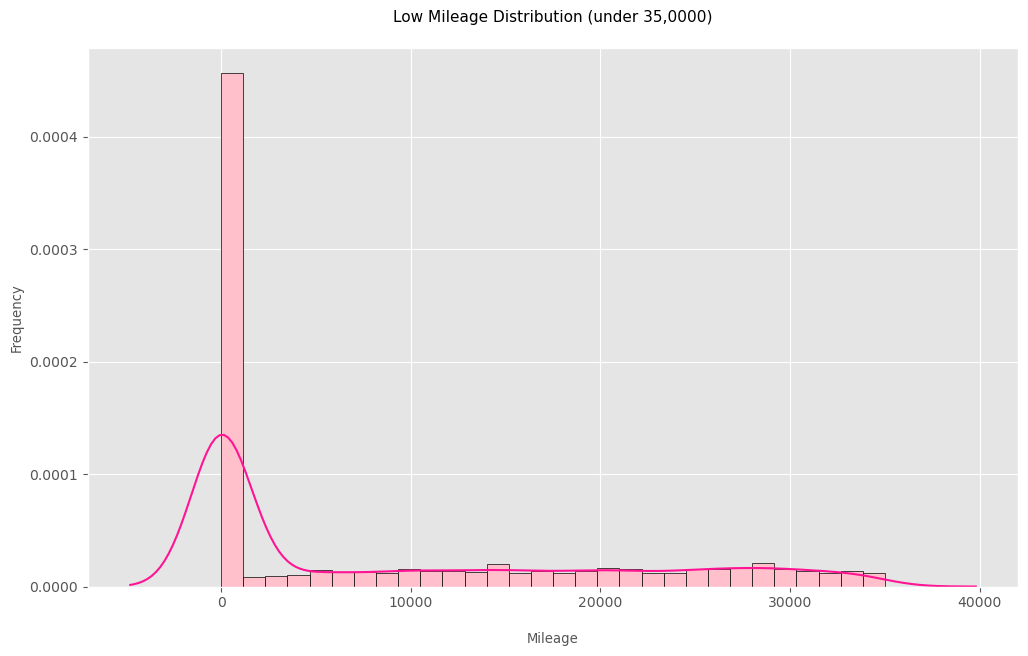

In [32]:
plt.figure(figsize = (12, 7))
low_mileage = df[df['mileage'] < 35000]
plt.hist(low_mileage['mileage'], bins = 30, edgecolor = 'black', color = 'pink', density = True)
sns.kdeplot(low_mileage['mileage'], color = 'deeppink')
plt.title('Low Mileage Distribution (under 35,0000)\n', fontsize = 11)
plt.xlabel('\nMileage', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*price analysis using province*

In [33]:
price_province = df.groupby('province')['price'].mean().sort_values(ascending = False)
price_province.head(10)

province
Niedersachsen               115000.000000
Moravian-Silesian Region     94938.970588
Pomorskie                    82275.801778
Śląskie                      79435.075333
Łódzkie                      73690.223456
Mazowieckie                  73049.495664
Opolskie                     70435.153846
Kujawsko-pomorskie           68294.812811
Podlaskie                    68122.441264
Małopolskie                  66041.445466
Name: price, dtype: float64

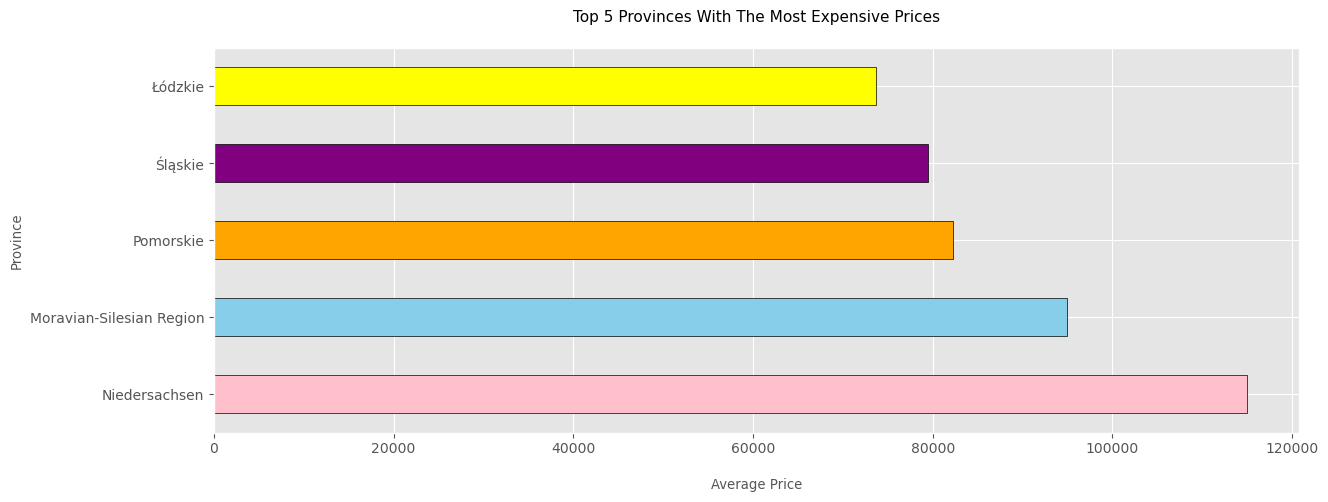

In [34]:
plt.figure(figsize = (14, 5))
price_province.head(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Most Expensive Prices\n', fontsize = 11)
plt.xlabel('\nAverage Price', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

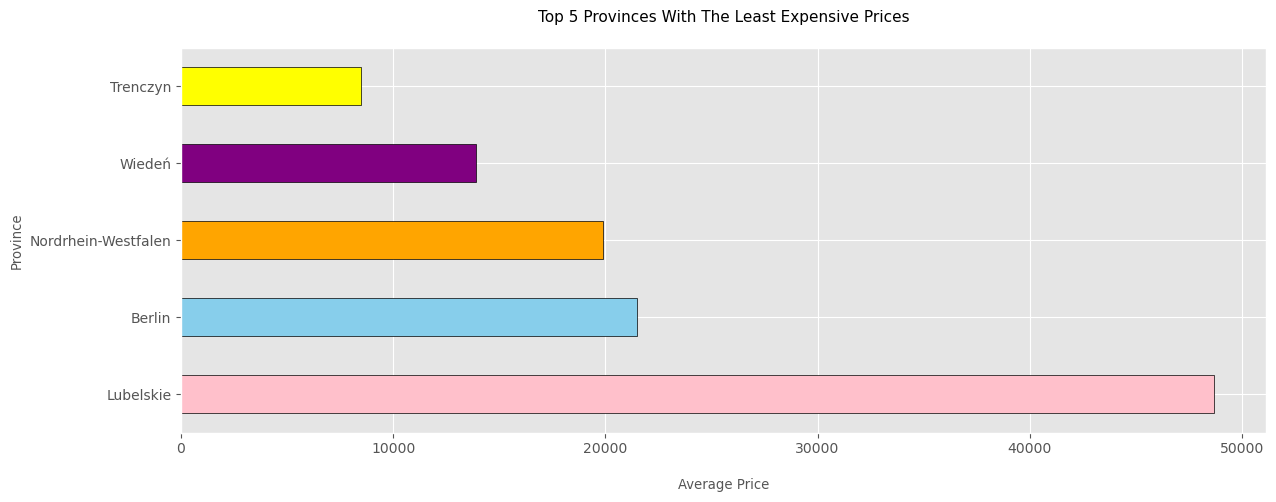

In [35]:
plt.figure(figsize = (14, 5))
price_province.tail(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Least Expensive Prices\n', fontsize = 11)
plt.xlabel('\nAverage Price', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

*province and car model analysis*

In [36]:
province_cars = df.groupby('province')['model'].count().sort_values(ascending = False)
province_cars.head(10)

province
Mazowieckie           20871
Śląskie               15677
Wielkopolskie         13272
Małopolskie            9242
Dolnośląskie           8370
Łódzkie                7384
Pomorskie              7199
Kujawsko-pomorskie     5027
Lubelskie              4488
Zachodniopomorskie     3737
Name: model, dtype: int64

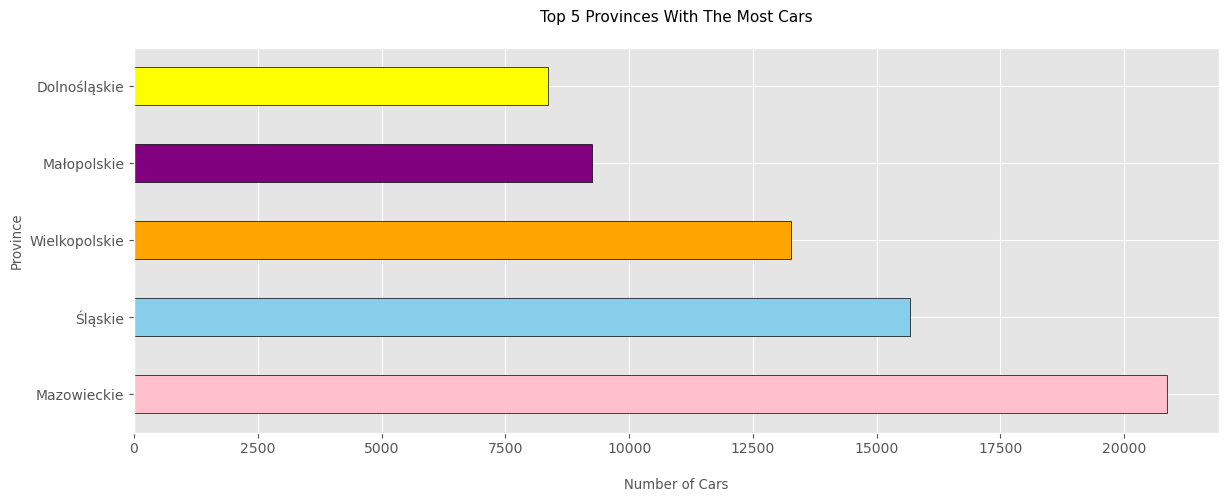

In [37]:
plt.figure(figsize = (14, 5))
province_cars.head(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Most Cars\n', fontsize = 11)
plt.xlabel('\nNumber of Cars', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

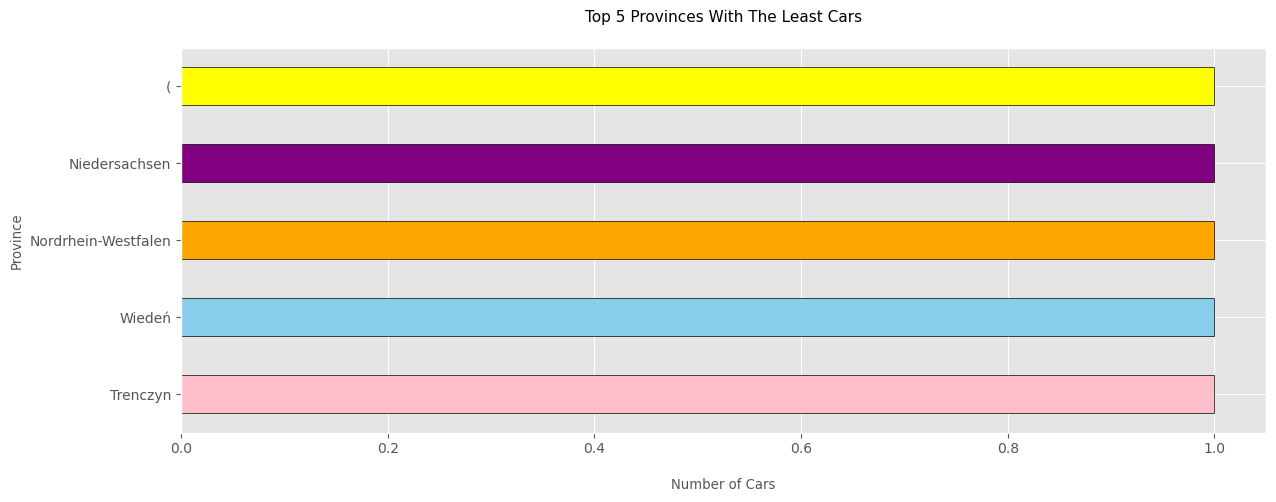

In [38]:
plt.figure(figsize = (14, 5))
province_cars.tail(5).plot(kind = 'barh', edgecolor = 'black', color = ['pink', 'skyblue', 'orange', 'purple', 'yellow'])
plt.title('Top 5 Provinces With The Least Cars\n', fontsize = 11)
plt.xlabel('\nNumber of Cars', fontsize = 9.5)
plt.ylabel('Province', fontsize = 9.5)
plt.show()

*mileage analysis by manufacturer and province*

In [39]:
mileage_pro_manu = df.groupby(['mark','province'])['mileage'].mean().sort_values(ascending = False).unstack()
mileage_pro_manu.head(5)

province,(,Berlin,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Moravian-Silesian Region,Niedersachsen,...,Podlaskie,Pomorskie,Trenczyn,Warmińsko-mazurskie,Wiedeń,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
mark,,,,,,,,,,,,,,,,,,,,,
alfa-romeo,NaN,NaN,177537.688889,130814.485714,163404.125000,118556.833333,138224.543307,139114.526316,NaN,NaN,...,37215.000000,115350.555556,NaN,145326.750000,NaN,131409.761905,117257.555556,132334.885714,144187.476190,193253.727273
audi,NaN,177000.0,169743.047004,133081.720412,199817.152034,207048.656000,155743.528651,167766.460938,NaN,99999.0,...,159572.843882,120966.963002,NaN,187473.706485,180000.0,171807.797830,182249.775000,141248.632911,141757.521936,181313.364384
bmw,NaN,NaN,159482.234223,162810.803828,193993.005013,185174.366972,148987.360416,137768.335118,NaN,NaN,...,168326.889401,148325.332808,NaN,169757.125000,NaN,144289.405467,174737.173410,147930.415094,107642.991536,164580.367052
chevrolet,NaN,NaN,125837.770833,155565.066667,124454.217391,146303.277778,139739.621622,133729.709677,NaN,NaN,...,135346.357143,166139.928571,NaN,156262.352941,NaN,141965.509434,137779.724138,146372.339623,135759.948980,151089.071429
citroen,NaN,NaN,167906.806931,183288.033058,184220.170370,177332.120000,172498.970711,165059.400000,NaN,NaN,...,192650.791667,180655.150943,NaN,185200.694915,NaN,156748.872390,163818.979592,167013.122340,149545.405914,184060.880435


*price by fuel type and manufacturer*

In [40]:
price_manu_fuel = df.groupby(['mark', 'fuel'])['price'].mean().sort_values(ascending = False).unstack()
price_manu_fuel.head(4)

fuel,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
mark,,,,,,
alfa-romeo,NaN,26460.347656,NaN,92664.543902,NaN,18444.400000
audi,91900.0,109290.006565,403804.688172,93532.788584,291275.954887,18254.003390
bmw,NaN,113219.239468,136625.494118,130234.566698,284609.683962,21262.779359
chevrolet,NaN,24286.471545,NaN,47907.954436,NaN,22620.848485


*fuel type distribution*

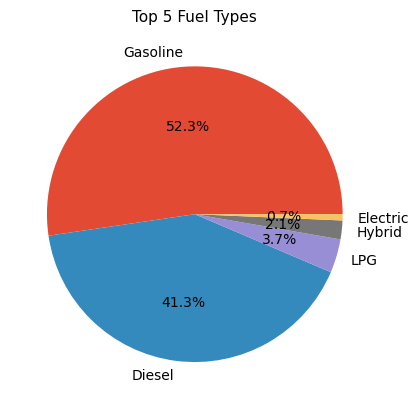

In [41]:
fuel_dist = df['fuel'].value_counts()
fuel_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Fuel Types', fontsize = 11)
plt.ylabel('')
plt.show()

*manufacturer distribution*

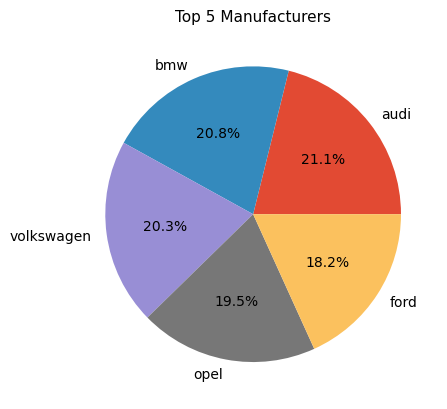

In [42]:
manu_dist = df['mark'].value_counts()
manu_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Manufacturers', fontsize = 11)
plt.ylabel('')
plt.show()

*city analysis*

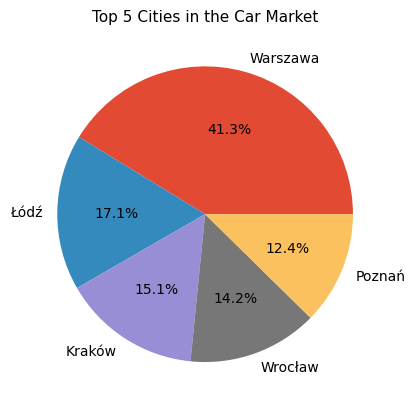

In [43]:
city_dist = df['city'].value_counts()
city_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Cities in the Car Market', fontsize = 11)
plt.ylabel('')
plt.show()

*province analysis*

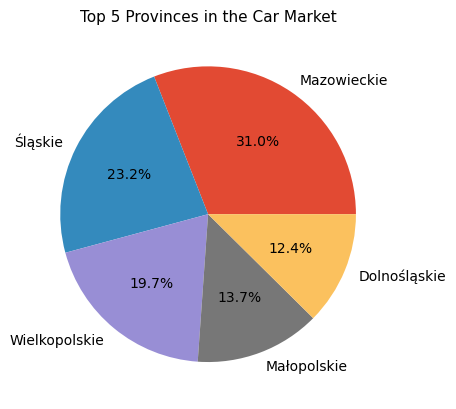

In [44]:
prov_dist = df['province'].value_counts()
prov_dist.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Top 5 Provinces in the Car Market', fontsize = 11)
plt.ylabel('')
plt.show()

**FEATURE ENGINEERING**

In [45]:
x = df.drop(columns = ['price', 'model', 'city', 'province'])
x.head()

y = df['price']

In [46]:
x.sample(4)

,mark,year,mileage,vol_engine,fuel
107578,peugeot,2015,191652,1997,Diesel
56261,mercedes-benz,2016,66700,3498,Gasoline
11546,opel,2018,123000,1598,Diesel
12014,opel,2011,250000,1686,Diesel


*encoding and scaling  x variables*

In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [48]:
x['mark'] = encoder.fit_transform(x['mark'])
x['fuel'] = encoder.fit_transform(x['fuel'])

*splitting data into train and test data*

In [49]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 1)

*scaling x train and x test*

In [50]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

*function to evaluate model performance*

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
def evaluator(pred):
    print(f'mean squared error: {round(mean_squared_error(y_test, pred),2)}')
    print(f'root mean squared error: {round(math.sqrt(mean_squared_error(y_test, pred)), 2)}')
    print(f'mean absolute error: {round(mean_absolute_error(y_test, pred),2)}')
    print(f'r squared: {round(r2_score(y_test, pred),2)}')

*training first model: **linear regression***

In [52]:
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(x_train_scaled, y_train)

LinearRegression()

*making predictions and evaluating*

In [53]:
lin_pred = lin_mod.predict(x_test_scaled)
evaluator(lin_pred)

mean squared error: 3009345624.98
root mean squared error: 54857.5
mean absolute error: 32371.66
r squared: 0.58


*training second model: **support vector regressor***

In [54]:
from sklearn.svm import SVR
s_mod = SVR()

In [ ]:
s_mod.fit(x_train_scaled, y_train)

*making predictions and evaluating*

In [ ]:
sv_pred = s_mod.predict(x_test_scaled)
evaluator(sv_pred)

*identifying the model's **best parameters***

In [ ]:
randSVR.best_params_

*training third model: **grid search random forest regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
p2 = {
    'n_estimators':[40, 50, 100, 200],
    'min_samples_split': [2, 4, 8]
}

In [ ]:
a= RandomForestRegressor(